In [37]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

n = '014'
sixhours = pd.read_csv(f'CAPE Distances/CAPE-{n}(4am-10am).csv') 
threehours = pd.read_csv(f'CAPE Distances/CAPE-{n}(10am-1pm).csv')
df_sixhours = pd.DataFrame(sixhours)
df_threehours = pd.DataFrame(threehours)

In [38]:
df_sixhours.drop(columns=df_sixhours.columns[0], axis=1, inplace=True)

In [39]:
df_threehours.drop(columns=df_threehours.columns[0], axis=1, inplace=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000000,0.557343,0.318142,0.313431,0.474810,0.842130,0.610892,0.377378,0.540352,0.563251,0.847912,0.643744,0.563336,1.255712,0.871404,0.844128,0.990887,1.552224
1,0.557343,0.000000,0.295100,0.282998,0.208922,0.925988,0.939036,0.315195,0.531336,0.891289,0.684928,0.123374,0.240731,0.867645,0.669588,1.103066,1.312428,1.014929
2,0.318142,0.295100,0.000000,0.097051,0.168459,0.745032,0.690569,0.124866,0.344243,0.642899,0.797171,0.393431,0.346129,1.000009,0.621293,0.853090,1.065607,1.298832
3,0.313431,0.282998,0.097051,0.000000,0.190561,0.765736,0.705141,0.128482,0.384882,0.650797,0.778453,0.378715,0.356138,1.006746,0.645908,0.880174,1.081151,1.292907
4,0.474810,0.208922,0.168459,0.190561,0.000000,0.754959,0.764026,0.167921,0.338089,0.726382,0.774972,0.282852,0.318279,0.866819,0.525574,0.904116,1.136658,1.173461
5,0.842130,0.925988,0.745032,0.765736,0.754959,0.000000,0.510150,0.651432,0.441271,0.453681,1.452892,0.979167,1.004279,1.331317,0.477226,0.410372,0.556995,1.792692
6,0.610892,0.939036,0.690569,0.705141,0.764026,0.510150,0.000000,0.649735,0.539041,0.144681,1.268874,0.991650,0.993259,1.426335,0.777718,0.358309,0.449953,1.908291
7,0.377378,0.315195,0.124866,0.128482,0.167921,0.651432,0.649735,0.000000,0.272376,0.590636,0.865227,0.401524,0.404601,1.002829,0.531589,0.801891,1.005675,1.312509
8,0.540352,0.531336,0.344243,0.384882,0.338089,0.441271,0.539041,0.272376,0.000000,0.498695,1.046212,0.595399,0.586642,1.037610,0.350292,0.597839,0.844910,1.448420
9,0.563251,0.891289,0.642899,0.650797,0.726382,0.453681,0.144681,0.590636,0.498695,0.000000,1.266520,0.952294,0.945930,1.438037,0.749069,0.390023,0.448026,1.874609


[3, 3, 3, 3, 2, 3, 3, 2, 2, 1, 2, 1, 1, 2, 1, 0, 3, 1]


<BarContainer object of 18 artists>

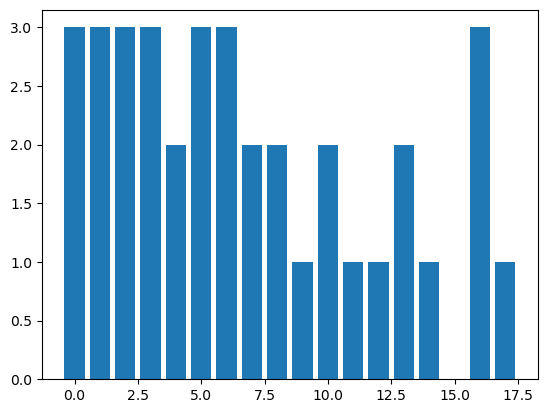

In [42]:
size = df_sixhours.shape[0]
res = []
for i in range(size):
    lst6 = df_sixhours[str(i)]
    lst6 = lst6.sort_values()
    best6 = lst6.iloc[1:6]
    lst3 = df_threehours[str(i)]
    lst3 = lst3.sort_values()
    best3 = lst3.iloc[1:6]
    # print(best6.index)
    # print(best3.index)
    res.append(sum(ele in best6.index for ele in best3.index))
print(res)

plt.bar(range(size),res)

In [47]:
def create_vectors(df_sixhours, df_threehours):
    zero = df_sixhours[str(0)][1:] #vectore for 6 hours
    one = df_threehours["0"][1:] #vector for 3 hours
    for i in range(size-1):
        i=i+1
        tmp = np.concatenate((df_sixhours[str(i)][:i],df_sixhours[str(i)][i+1:]))
        tmp1 = np.concatenate((df_threehours[str(i)][:i],df_threehours[str(i)][i+1:]))
        zero = np.concatenate((zero, tmp), axis = None)
        one = np.concatenate((one,tmp1), axis = None)
    return zero, one

zero, one = create_vectors(df_sixhours, df_threehours)

In [48]:
#Calculate the correlation
data = {"sixhours":zero, "threehours":one}

data = pd.DataFrame(data)



data.corr()

,sixhours,threehours
sixhours,1.000000,0.155267
threehours,0.155267,1.000000
